# Predicting AirBNB Price
We are building a price recomendation model to predict optimal hosting price!

*Valentino Prasetya, 25 February 2021*

**Authors Note :**

This notebook is a part of my job application portfolio as data scientist role in a tech company. To be honest, a number of notebooks have already analyzed similar AirBNB hosting data. Three notebooks I referred to are ones created by [Maksym](https://rstudio-pubs-static.s3.amazonaws.com/407929_afc5ef0f2ad648389447a6ca3f4a7cd4.html), [Lewis](https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-deep-learning-f46d44afb8a6), and [Graciela](https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-location-data-5c1e033d0a5a#3efa). Understanding them is a challenge in itself, however I am grateful that I am able to learn a lot from this experience. Aside from using these reference, I also did a lot of experimenting in cleaning the data and building different models. Hope you enjoy!

![AirBNB_Intro.jpg](https://news.airbnb.com/wp-content/uploads/sites/4/2019/06/PJM020719Q202_Luxe_WanakaNZ_LivingRoom_0264-LightOn_R1.jpg).  

**Case Study :**

AirBNB is a platform which connects people who want to rent out their property (hosts) with the people who are looking for a place to rent. One challenge that the hosts had when renting their property is determining the property price. If the price is too low, then they will loss potential profit. Otherwise, if price is set too high, then potential customer could be lost or lower customer satisfaction. Since profit is shared between AirBNB and the hosts, it is important to determine the optimal property price. 

In order to improve profit, AirBNB has been collecting data about properties, hosts, and ratings given by customers. Data scientists were asked to give informations related to pricing and builds a predictive model to recommended
optimal price for the property.

**Goals :**

- Build a model to predict optimal price
- Give insight related to which variables are important in determining price

**Terminology :**
- Host : Someone who want to rent their property
- Listing : The property that that is for sale or for rent (in this context, listing and property can be used interchangeably)
- Amenities : Useful features of a property

**Limitations**
- In order to give optimal price, we will need a price that is trusted. We will assume that a price is trusted to be optimal if there is at least a review. In this case, we will use sample that at least have 1 review
- There are a few most expensive listings which price is far higher than the rest of the listings. Due to the lack of property of this kind (which will be visualized later), we will drop this kind of data.
- This model doesn't use spatial analysis or NLP

**Setting up the library**

We import all the required Python libraries

In [133]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = 30

# Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the Data

### Import the data

The dataset was taken from [AirBNB Dataset](http://insideairbnb.com/get-the-data.html) taken in Singapore on June 25, 2019.

In [134]:
# Import Data
air_df = pd.read_csv("Airbnb listing.csv", encoding='latin')
air_df.head()

C:\Users\valen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (40,41,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190625153033,43641,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,NaN,NaN,https://a0.muscache.com/im/pictures/24485541/6...,NaN,266763,https://www.airbnb.com/users/show/266763,Francesca,40471.0,singapore,I am a private tutor by profession. My husband...,NaN,f,https://a0.muscache.com/im/pictures/94361977-2...,https://a0.muscache.com/im/pictures/94361977-2...,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,NaN,730702,Singapore,Singapore,SG,Singapore,1.44255,103.79580,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.0,81,NaN,1015.0,NaN,NaN,1,14,180,360,180,180,360,360,180.0,360.0,61 months ago,t,30,60,90,365,43641,0,41568.0,41568.0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,NaN,NaN,f,f,t,t,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20190625153033,43641,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,NaN,NaN,https://a0.muscache.com/im/pictures/36342984/6...,NaN,227796,https://www.airbnb.com/users/show/227796,Sujatha,40429.0,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,f,https://a0.muscache.com/im/pictures/8fd2cddb-2...,https://a0.muscache.com/im/pictures/8fd2cddb-2...,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,NaN,589664,Singapore,Singapore,SG,Singapore,1.33235,103.78521,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,80,400.0,1600.0,NaN,NaN,2,20,90,730,90,90,730,730,90.0,730.0,59 months ago,t,30,60,90,365,43641,0,41747.0,41999.0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,f,t,1,0,1,0,0.

In [135]:
# Set id to index
air_df = air_df.set_index(['id'], drop=True)

In [136]:
air_df.shape

(8293, 97)

In [137]:
air_df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
   

In [138]:
number_of_nulls = air_df.isnull().sum()

with pd.option_context('display.max_rows', None):
    print(number_of_nulls)

listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               2
summary                                          260
space                                           2157
description                                      152
experiences_offered                                0
neighborhood_overview                           3370
notes                                           3418
transit                                         3298
access                                          3036
interaction                                     3579
house_rules                                     3819
thumbnail_url                                   8293
medium_url                                      8293
picture_url                                        0
xl_picture_url                                  8293
host_id                                       

In [139]:
# As limitations of the study, we will use data with at least a review
air_df = air_df[air_df['review_scores_rating'].notna()]

In [140]:
# Check number of unique values
unique_value_counts = air_df.apply(
    lambda x : len(x.unique()), 
    axis = 0)

with pd.option_context('display.max_rows', None):
    print(unique_value_counts)

listing_url                                     5010
scrape_id                                          1
last_scraped                                       1
name                                            4835
summary                                         3447
space                                           2681
description                                     3989
experiences_offered                                1
neighborhood_overview                           1810
notes                                           1605
transit                                         1920
access                                          1962
interaction                                     1539
house_rules                                     1966
thumbnail_url                                      1
medium_url                                         1
picture_url                                     4724
xl_picture_url                                     1
host_id                                       

### Feature Selection

In [141]:
air_df2 = air_df.copy()

In [142]:
# Drop url columns unless we want to scrape further
dropped_column_urls = [
    'listing_url', 'thumbnail_url', 'medium_url', 'picture_url',
    'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url',
]

# Drop Identifiers/Names which is explained by other variables (Except id as index)
dropped_column_identifiers = ['scrape_id', 'host_id', 'host_name']

# Drop Columns which has only 1 unique value (all rows has the same value) which contains no information
dropped_column_unique = [
    'last_scraped', 'experiences_offered', 'host_acceptance_rate',
    'country_code', 'country', 'has_availability', 'requires_license',
    'is_business_travel_ready', 'calendar_last_scraped'
]

# Drop Column with too much null value
dropped_column_nulls = ['square_feet', 'jurisdiction_names', 'license']

# Remove these type text columns because :
# 1. The values has been extracted to other variables
# 2. We limit our model building without NLP
dropped_column_text = [
    'name', 'summary', 'space', 'description', 'neighborhood_overview',
    'notes', 'transit', 'access', 'interaction', 'house_rules'
]
dropped_column = dropped_column_urls + dropped_column_identifiers + dropped_column_unique + dropped_column_nulls + dropped_column_text
air_df2.drop(dropped_column, axis=1, inplace=True)
air_df2.columns

Index(['host_since', 'host_location', 'host_about', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews_ltm', 'first_review'

In [143]:
# Drop Variables which contains similar informations

# Host Location -- we need host location which has the most information (not too many categories with few values)
# We will use the host country (which will be extracted from host_location later), drop host_neighbourhood
air_df2.drop(['host_neighbourhood'], axis=1, inplace=True)

# Listing Location - since we don't use spatial analysis, we will drop these variables
air_df2.drop(['neighbourhood', 'neighbourhood_cleansed', 'is_location_exact', 'market', 'smart_location', 
              'latitude', 'longitude', 'street', 'city', 'state', 'zipcode'], axis=1, inplace=True)

# Maximum & Minimum Nights -- maximum_nights and minimum nights will be used
air_df2.drop([
    'minimum_minimum_nights', 'maximum_minimum_nights', 
    'minimum_maximum_nights', 'maximum_maximum_nights', 
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'
],
             axis=1,
             inplace=True)

# Host Listing Counts -- we use calculated_host_listing_count, with assumption that this variable is more valuable than the rest.
air_df2.drop([
    'host_listings_count', 'host_total_listings_count', 
    'calculated_host_listings_count_entire_homes', 
    'calculated_host_listings_count_private_rooms', 
    'calculated_host_listings_count_shared_rooms'
],
             axis=1,
             inplace=True)

# Theoritically not a variable which can affect price
air_df2.drop(['host_verifications', 'calendar_updated'], axis = 1, inplace = True)

# Price informations -- The target variable! We choose price as the target and drop weekly and monthly price
air_df2.drop(['weekly_price', 'monthly_price'], axis=1, inplace=True)

# Security and Cleaning Fee - In relation to our business case, security_deposit and cleaning_fee can't be used as predictors
# The reason is that in the future, we want to predict price without knowing the security_deposit and cleaning_fee
# These variables should be used as target variables, however in this session, we will limit the research to one target variable
air_df2.drop(['security_deposit', 'cleaning_fee'], axis=1, inplace=True)
air_df2.columns

Index(['host_since', 'host_location', 'host_about', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [144]:
air_df2.shape

(5010, 35)

In [145]:
air_df2.describe()

,host_since,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,4930.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5008.00000,5008.000000,5010.000000,5005.000000,5007.000000,5000.000000,5005.000000,4999.000000,4999.000000,5010.000000,5008.000000
mean,42315.184584,146.930938,1.997006,16.209780,11.730739,937.863673,9.949301,25.953693,45.775649,200.233533,8.685828,43001.94988,43420.078874,90.196806,9.202797,8.976633,9.493600,9.463936,9.319264,8.967594,33.851896,1.066558
std,728.670405,256.310358,1.593117,19.304489,32.911479,1478.334006,10.605497,21.270868,31.525783,138.711409,13.824308,526.73534,325.821370,12.335821,1.271432,1.348137,1.043924,1.078526,1.024359,1.242565,57.561678,1.268266
min,39993.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40667.00000,41568.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,41821.000000,60.000000,1.000000,0.000000,1.000000,1124.000000,0.000000,5.000000,17.000000,61.000000,1.000000,42625.75000,43371.750000,86.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,2.000000,0.210000
50%,42293.000000,110.000000,1.000000,15.000000,2.000000,1125.000000,6.000000,23.000000,48.000000,215.000000,3.000000,43133.00000,43571.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,8.000000,0.570000
75%,42869.000000,180.000000,2.000000,25.000000,6.000000,1125.000000,19.000000,46.000000,75.000000,336.000000,10.000000,43451.00000,43619.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,30.000000,1.440000
max,43632.000000,10000.000000,16.000000,400.000000,500.000000,99999.000000,30.000000,60.000000,90.000000,365.000000,156.000000,43641.00000,43641.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,277.000000,12.090000


### Handling Missing Value

In [146]:
# Checkpoint
air_df3 = air_df2.copy()

In [147]:
# Check Number of Missing Values
with pd.option_context('display.max_rows', None) :
    print(air_df3.isnull().sum())

host_since                            80
host_location                         89
host_about                          1758
host_is_superhost                     80
host_has_profile_pic                  80
host_identity_verified                80
neighbourhood_group_cleansed           0
property_type                          0
room_type                              0
bed_type                               0
amenities                              0
price                                  0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
availability_30                        0
availability_60                        0
availability_90                        0
availability_365                       0
number_of_reviews_ltm                  0
first_review                           2
last_review                            2
review_scores_rating                   0
review_scores_ac

In [148]:
# Imput empty string to host_about, we will use this variable late to extract the length of information the host posted
air_df3[['host_about']] = air_df3[['host_about']].fillna('')

# Drop the remaining insignificant variables
air_df3 = air_df3.dropna(how = 'any')

# Check again if there is null values
air_df3.isnull().sum()

host_since                          0
host_location                       0
host_about                          0
host_is_superhost                   0
host_has_profile_pic                0
                                   ..
instant_bookable                    0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 35, dtype: int64

There is no more null values!

In [149]:
air_df3.shape

(4905, 35)

### Checking data types and labelling Data

In [150]:
with pd.option_context('display.max_rows', None) :
    print(air_df3.dtypes)

host_since                          float64
host_location                        object
host_about                           object
host_is_superhost                    object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_group_cleansed         object
property_type                        object
room_type                            object
bed_type                             object
amenities                            object
price                                 int64
guests_included                       int64
extra_people                          int64
minimum_nights                        int64
maximum_nights                        int64
availability_30                       int64
availability_60                       int64
availability_90                       int64
availability_365                      int64
number_of_reviews_ltm                 int64
first_review                        float64
last_review                     

In [151]:
# Convert these variables below (which value is  t/f into 1/0)
tf_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 
          'require_guest_profile_picture', 'require_guest_phone_verification']
for col in tf_cols :
    air_df3[col] = air_df3[col].map({'t': 1, 'f': 0})

air_df3.dtypes

host_since                          float64
host_location                        object
host_about                           object
host_is_superhost                     int64
host_has_profile_pic                  int64
                                     ...   
instant_bookable                      int64
require_guest_profile_picture         int64
require_guest_phone_verification      int64
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 35, dtype: object

## Feature Extraction

In this section, we will check more detail about each variables, and extract the important information we can get

In [152]:
# Checkpoint
air_df4 = air_df3.copy()

### Dealing with Amenities

In [153]:
# Amenities contains lists of items. We want to be able to extract these items into features
air_df4['amenities'].head()

id
49091    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
50646    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
56334    {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
71609    {TV,Wifi,"Air conditioning",Kitchen,"Pets live...
71896    {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
Name: amenities, dtype: object

In [154]:
def set_in_string_format_to_list(list_): # Convert set which is saved in string format to a clean list
    list_ = list_.replace('{', '').replace('}', ',').replace('"', '')
    list_ = [x.strip() for x in list_.split(',')]
    list_ # Remove last element which is an empty string
    return(list_)


air_df4['amenities'] = air_df4['amenities'].apply(set_in_string_format_to_list)
air_df4['amenities'].head()

id
49091    [TV, Cable TV, Internet, Wifi, Air conditionin...
50646    [TV, Cable TV, Internet, Wifi, Air conditionin...
56334    [TV, Cable TV, Wifi, Air conditioning, Kitchen...
71609    [TV, Wifi, Air conditioning, Kitchen, Pets liv...
71896    [TV, Internet, Wifi, Air conditioning, Kitchen...
Name: amenities, dtype: object

In [155]:
# Count the number of each amenities
amenities_dict = {}
for i in air_df4["amenities"]:
    for j in i:
        if j not in amenities_dict:
            amenities_dict[j] = 1
        else:
            amenities_dict[j] += 1

amenities_count = pd.Series(amenities_dict).sort_values()
with pd.option_context('display.max_rows', None):
    print(amenities_count)

Kitchenette                                      1
Fireplace guards                                 1
Air purifier                                     1
Electric profiling bed                           2
Full kitchen                                     2
Firm mattress                                    5
Mobile hoist                                     5
Pool with pool hoist                             5
Ground floor access                              5
Hot water kettle                                 6
Baby monitor                                     6
Bathtub with bath chair                          8
Stair gates                                     10
Changing table                                  11
Other pet(s)                                    13
Outlet covers                                   14
Private bathroom                                16
Beach essentials                                16
EV charger                                      17
Table corner guards            

In [156]:
# Remove items which is not informative (too few 1 or too few 0 values)
n = air_df4.shape[0] 
minimum_one = 0.05 * n # Remove variables that has too few 1 value
maximum_one = 0.95 * n # Remove variables that has too much 1 value (few 0 value)
amenities_count = amenities_count[(amenities_count > minimum_one) & (amenities_count < maximum_one)]
amenities_set = amenities_count.index

amenities_set

Index(['Cleaning before checkout', 'Room-darkening shades', 'BBQ grill',
       'Garden or backyard', 'Flat path to guest entrance',
       'Extra space around bed', 'Coffee maker', 'Suitable for events', 'Crib',
       'Wide entryway', 'Handheld shower head', 'Wide entrance',
       'Wide hallways', 'High chair', 'Wide entrance for guests',
       'Free street parking', 'Hot tub', 'Private living room', 'Breakfast',
       'Other', 'Building staff', 'Buzzer/wireless intercom',
       'Patio or balcony', 'Keypad',
       'translation missing: en.hosting_amenity_49', 'Wheelchair accessible',
       'Well-lit path to entrance', 'Single level home', '24-hour check-in',
       'Pets allowed', 'translation missing: en.hosting_amenity_50',
       'Smoking allowed', 'Oven', 'Paid parking on premises', 'Safety card',
       'Cable TV', 'Extra pillows and blankets', 'Carbon monoxide detector',
       'Paid parking off premises', 'Cooking basics', 'Host greets you',
       'Private entrance', 'S

In [157]:
# Extract features from amenities
def create_boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: int(item in x))
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

amenities_boolean_df = create_boolean_df(air_df4['amenities'], amenities_set)
amenities_boolean_df.head()

,Cleaning before checkout,Room-darkening shades,BBQ grill,Garden or backyard,Flat path to guest entrance,Extra space around bed,Coffee maker,Suitable for events,Crib,Wide entryway,Handheld shower head,Wide entrance,Wide hallways,High chair,Wide entrance for guests,Free street parking,Hot tub,Private living room,Breakfast,Other,Building staff,Buzzer/wireless intercom,Patio or balcony,Keypad,translation missing: en.hosting_amenity_49,Wheelchair accessible,Well-lit path to entrance,Single level home,24-hour check-in,Pets allowed,translation missing: en.hosting_amenity_50,Smoking allowed,Oven,Paid parking on premises,Safety card,Cable TV,Extra pillows and blankets,Carbon monoxide detector,Paid parking off premises,Cooking basics,Host greets you,Private entrance,Self check-in,Stove,Luggage dropoff allowed,Dishes and silverware,Internet,Heating,First aid kit,No stairs or steps to enter,Free parking on premises,Microwave,Bed linens,Family/kid friendly,Refrigerator,Fire extinguisher,Gym,Smoke detector,Long term stays allowed,Pool,Lock on bedroom door,Dryer,Hot water,Elevator,TV,Laptop friendly workspace,Shampoo,Iron,Hair dryer,Kitchen,Hangers,Washer,Essentials
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
50646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1
56334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0
71609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1
71896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1


In [158]:
# Combine the extracted values to the original dataframe
air_df4 = pd.concat([air_df4, amenities_boolean_df], axis = 1)

In [159]:
# We can also extract the number of amenities, since it is possible that more amenities affect prices
air_df4['total_amenities'] = air_df4['amenities'].apply(len)

# After that, remove amenities column
air_df4.drop(['amenities'], axis = 1, inplace = True)

air_df4.head()

,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Cleaning before checkout,Room-darkening shades,BBQ grill,Garden or backyard,Flat path to guest entrance,Extra space around bed,Coffee maker,Suitable for events,Crib,Wide entryway,Handheld shower head,Wide entrance,Wide hallways,High chair,Wide entrance for guests,Free street parking,Hot tub,Private living room,Breakfast,Other,Building staff,Buzzer/wireless intercom,Patio or balcony,Keypad,translation missing: en.hosting_amenity_49,Wheelchair accessible,Well-lit path to entrance,Single level home,24-hour check-in,Pets allowed,translation missing: en.hosting_amenity_50,Smoking allowed,Oven,Paid parking on premises,Safety card,Cable TV,Extra pillows and blankets,Carbon monoxide detector,Paid parking off premises,Cooking basics,Host greets you,Private entrance,Self check-in,Stove,Luggage dropoff allowed,Dishes and silverware,Internet,Heating,First aid kit,No stairs or steps to enter,Free parking on premises,Microwave,Bed linens,Family/kid friendly,Refrigerator,Fire extinguisher,Gym,Smoke detector,Long term stays allowed,Pool,Lock on bedroom door,Dryer,Hot water,Elevator,TV,Laptop friendly workspace,Shampoo,Iron,Hair dryer,Kitchen,Hangers,Washer,Essentials,total_amenities
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,40471.0,singapore,I am a private tutor by profession. My husband...,0,1,0,North Region,Apartment,Private room,Real Bed,81,1,14,180,360,30,60,90,365,0,41568.0,41568.0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,0,1,1,2,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,10
50646,40429.0,"Singapore, Singapore","I am a working professional, living in Singapo...",0,1,0,Central Region,Apartment,Private room,Real Bed,80,2,20,90,730,30,60,90,365,0,41747.0,41999.0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,0,0,1,1,0.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,14
56334,40471.0,singapore,I am a private tutor by profession. My husband...,0,1,0,North Region,Apartment,Private room,Real Bed,68,1,14,6,14,30,60,90,365,0,40719.0,42278.0,98.0,10.0,10.0,10.0,10.0,8.0,9.0,0,1,1,2,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,11
71609,40572.0,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,0,1,1,East Region,Villa,Private room,Real Bed,200,4,27,1,1125,25,51,78,353,2,40896.0,43471.0,80.0,8.0,8.0,9.0,9.0,8.0,8.0,1,0,1,9,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,27
71896,40572.0,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,0,1,1,East Region,House,Private room,Real Bed,92,1,20,1,1125,25,51,78,353,0,40754.0,42960.0,80.0,8.0,8.0,9.0,9.0,8.0,8.0,1,0,1,9,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,23


### Hosting and Listing Duration

In [160]:
# Checkpoint
air_df5 = air_df4.copy()

In [161]:
# Extract listing and hosting durations
air_df5['listing_duration'] = air_df5['last_review'] - air_df5['first_review']
air_df5['hosting_duration'] = air_df5['last_review'] - air_df5['host_since']

In [162]:
air_df5.drop(['first_review', 'last_review', 'host_since'], axis = 1, inplace = True)

### Host Information

In [163]:
# Extract the country of the host using the variable host_location
def is_singaporean(host_location_string) :
    if 'singaporean' in host_location_string.lower() or 'sg' in host_location_string.lower():
        return 1
    else :
        return 0
air_df5['is_singaporean'] = air_df5['host_location'].apply(is_singaporean)

In [164]:
air_df5['is_singaporean'].value_counts()

0    4120
1     785
Name: is_singaporean, dtype: int64

In [165]:
# Extract length of host about section since it is possible that more information about hosts, the more reliable the host, 
# Hence, it could affects prices
air_df3['host_about_len'] = air_df3['host_about'].apply(len)

In [166]:
# Drop host_location and host_about
air_df5.drop(['host_location', 'host_about'], axis = 1, inplace = True)
air_df5.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Cleaning before checkout,Room-darkening shades,BBQ grill,Garden or backyard,Flat path to guest entrance,Extra space around bed,Coffee maker,Suitable for events,Crib,Wide entryway,Handheld shower head,Wide entrance,Wide hallways,High chair,Wide entrance for guests,Free street parking,Hot tub,Private living room,Breakfast,Other,Building staff,Buzzer/wireless intercom,Patio or balcony,Keypad,translation missing: en.hosting_amenity_49,Wheelchair accessible,Well-lit path to entrance,Single level home,24-hour check-in,Pets allowed,translation missing: en.hosting_amenity_50,Smoking allowed,Oven,Paid parking on premises,Safety card,Cable TV,Extra pillows and blankets,Carbon monoxide detector,Paid parking off premises,Cooking basics,Host greets you,Private entrance,Self check-in,Stove,Luggage dropoff allowed,Dishes and silverware,Internet,Heating,First aid kit,No stairs or steps to enter,Free parking on premises,Microwave,Bed linens,Family/kid friendly,Refrigerator,Fire extinguisher,Gym,Smoke detector,Long term stays allowed,Pool,Lock on bedroom door,Dryer,Hot water,Elevator,TV,Laptop friendly workspace,Shampoo,Iron,Hair dryer,Kitchen,Hangers,Washer,Essentials,total_amenities,listing_duration,hosting_duration,is_singaporean
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,0,1,0,North Region,Apartment,Private room,Real Bed,81,1,14,180,360,30,60,90,365,0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,0,1,1,2,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,10,0.0,1097.0,0
50646,0,1,0,Central Region,Apartment,Private room,Real Bed,80,2,20,90,730,30,60,90,365,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,0,0,1,1,0.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,14,252.0,1570.0,0
56334,0,1,0,North Region,Apartment,Private room,Real Bed,68,1,14,6,14,30,60,90,365,0,98.0,10.0,10.0,10.0,10.0,8.0,9.0,0,1,1,2,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,11,1559.0,1807.0,0
71609,0,1,1,East Region,Villa,Private room,Real Bed,200,4,27,1,1125,25,51,78,353,2,80.0,8.0,8.0,9.0,9.0,8.0,8.0,1,0,1,9,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,27,2575.0,2899.0,0
71896,0,1,1,East Region,House,Private room,Real Bed,92,1,20,1,1125,25,51,78,353,0,80.0,8.0,8.0,9.0,9.0,8.0,8.0,1,0,1,9,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,23,2206.0,2388.0,0


## Data Visualization & Cleaning

In this section, the data will be preapared and some explanatory analysis will be done. Some EDA were done outside of Jupyter Notebook (using tools like Orange) for efficiency purpose. However, important visualization will still be done here

In [167]:
air_df6 = air_df5.copy()

### host data

In [168]:
air_df6['host_is_superhost'].value_counts()

0    3956
1     949
Name: host_is_superhost, dtype: int64

In [169]:
air_df6['host_has_profile_pic'].value_counts()

1    4904
0       1
Name: host_has_profile_pic, dtype: int64

In [170]:
# host_has_profile_pic variable is not informative enough
air_df6.drop(['host_has_profile_pic'], axis=1, inplace=True)

In [171]:
air_df6['host_identity_verified'].value_counts()

0    3302
1    1603
Name: host_identity_verified, dtype: int64

### Price

<AxesSubplot:>

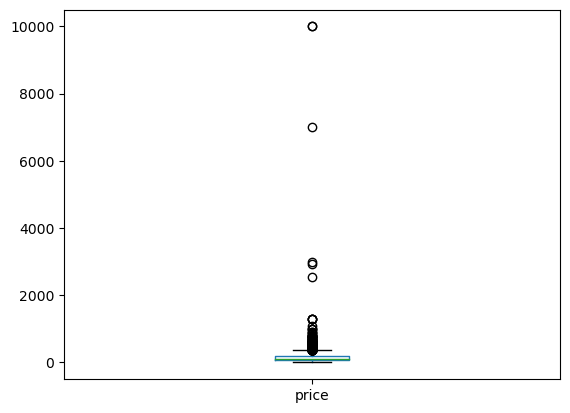

In [172]:
# Check distribution of prices
air_df6[['price']].plot(kind = 'box')

It can be seen that the distributions of price is really skewed, where 

In [173]:
air_df6['price'].describe()

count     4905.000000
mean       148.004281
std        258.874611
min          0.000000
25%         60.000000
50%        110.000000
75%        180.000000
max      10000.000000
Name: price, dtype: float64

In [174]:
air_df6.drop(air_df6[air_df6['price'] == 0].index, axis = 0, inplace=True)

In [175]:
upper_limit = 2.5 * air_df6['price'].describe()['75%'] - 1.5 * air_df6['price'].describe()['25%']
upper_limit

360.0

In [176]:
count, bins = np.histogram(air_df6['price'], bins = np.arange(0, 2000, 100))
print(count)

[2215 1613  655  278   66   29   17    6    8    4    2    0    2    2
    0    0    0    0    0]


In [177]:
air_df6[air_df6['price'] > upper_limit].shape

(233, 105)

In [178]:
air_df6.drop(air_df6[air_df6['price'] >= upper_limit].index, axis = 0, inplace=True)

In [179]:
# air_df6['security_deposit'].plot(kind = 'hist', bins = 50, figsize = (10, 10))

In [180]:
# air_df6['cleaning_fee'].plot(kind = 'hist', bins = 50, figsize = (10, 10))

### Amenities

In [181]:
air_df6['property_type'].value_counts()

Apartment             2110
Condominium            976
Serviced apartment     519
House                  307
Hostel                 253
Townhouse              100
Loft                    92
Hotel                   75
Bed and breakfast       56
Boutique hotel          52
Bungalow                29
Other                   26
Guest suite             15
Guesthouse              14
Tent                    12
Villa                    8
Aparthotel               4
Campsite                 3
Boat                     3
Cabin                    1
Cottage                  1
Name: property_type, dtype: int64

C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.2% of the points 

[]

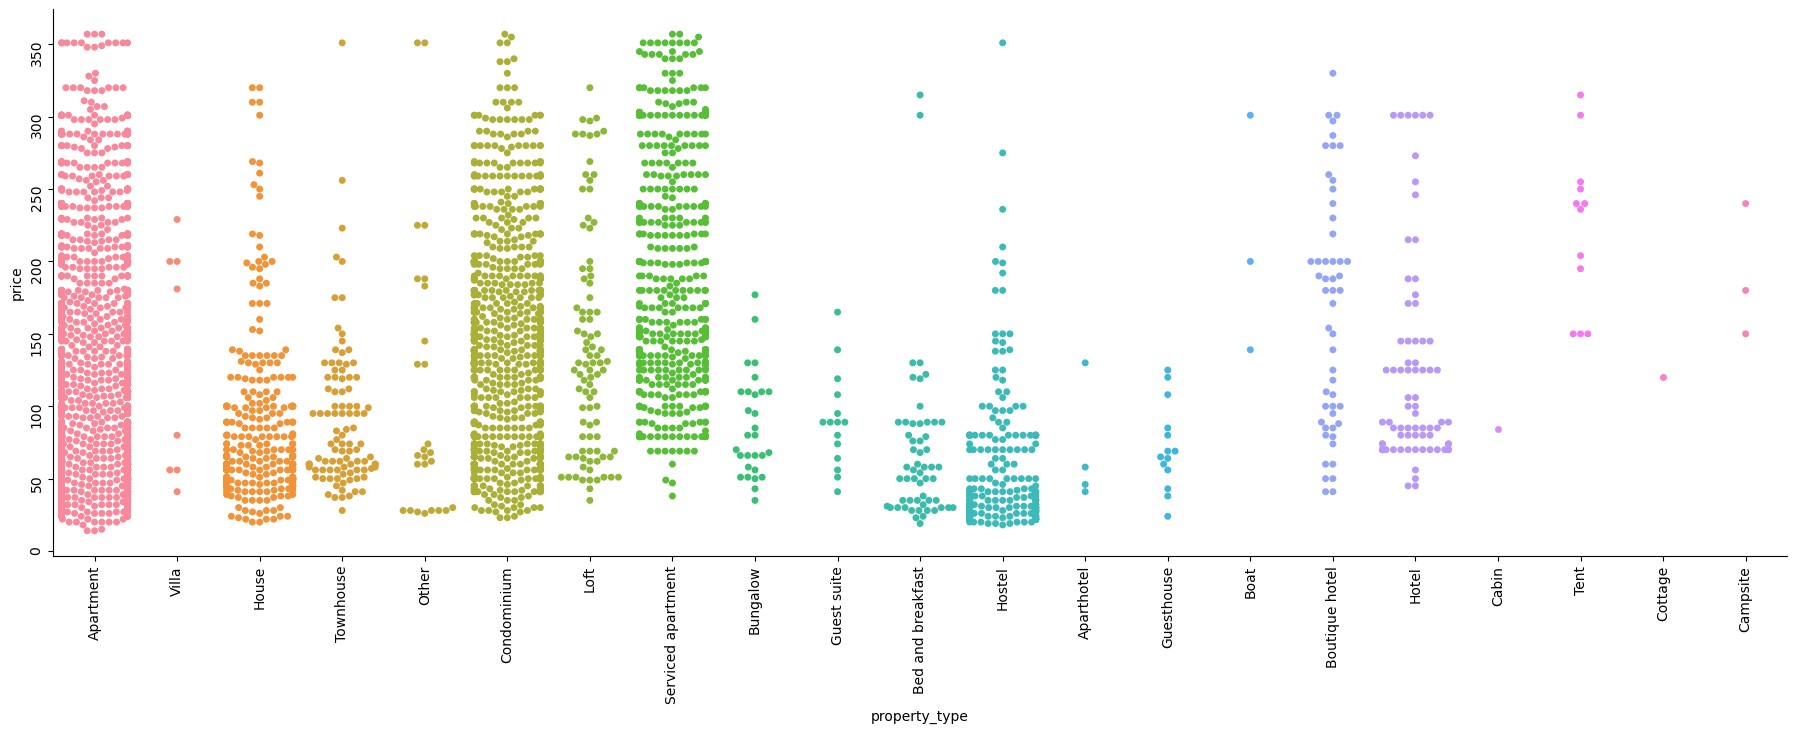

In [182]:
g = sns.catplot(x = 'property_type', y = 'price', data = air_df6, kind = 'swarm', height=6, aspect=3)
for ax in g.axes.flat :
    ax.tick_params(rotation= 90)
plt.plot()

In [183]:
property_map = {
    'Guest suite': 'Tourism',
    'Guesthouse': 'Tourism',
    'Tent': 'Tourism',
    'Villa': 'Tourism',
    'Aparthotel': 'Apartment',
    'Bed and breakfast': 'Other',
    'Bungalow': 'Tourism',
    'Boat': 'Tourism',
    'Loft': 'Tourism',
    'Campsite': 'Tourism',
    'Cabin': 'Tourism',
    'Cottage': 'Tourism',
    'Boutique hotel': 'Hotel',
}
air_df6['property_type'] = air_df6['property_type'].replace(property_map)

In [184]:
air_df6['property_type'].value_counts()

Apartment             2114
Condominium            976
Serviced apartment     519
House                  307
Hostel                 253
Tourism                178
Hotel                  127
Townhouse              100
Other                   82
Name: property_type, dtype: int64

C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.9% of the points

[]

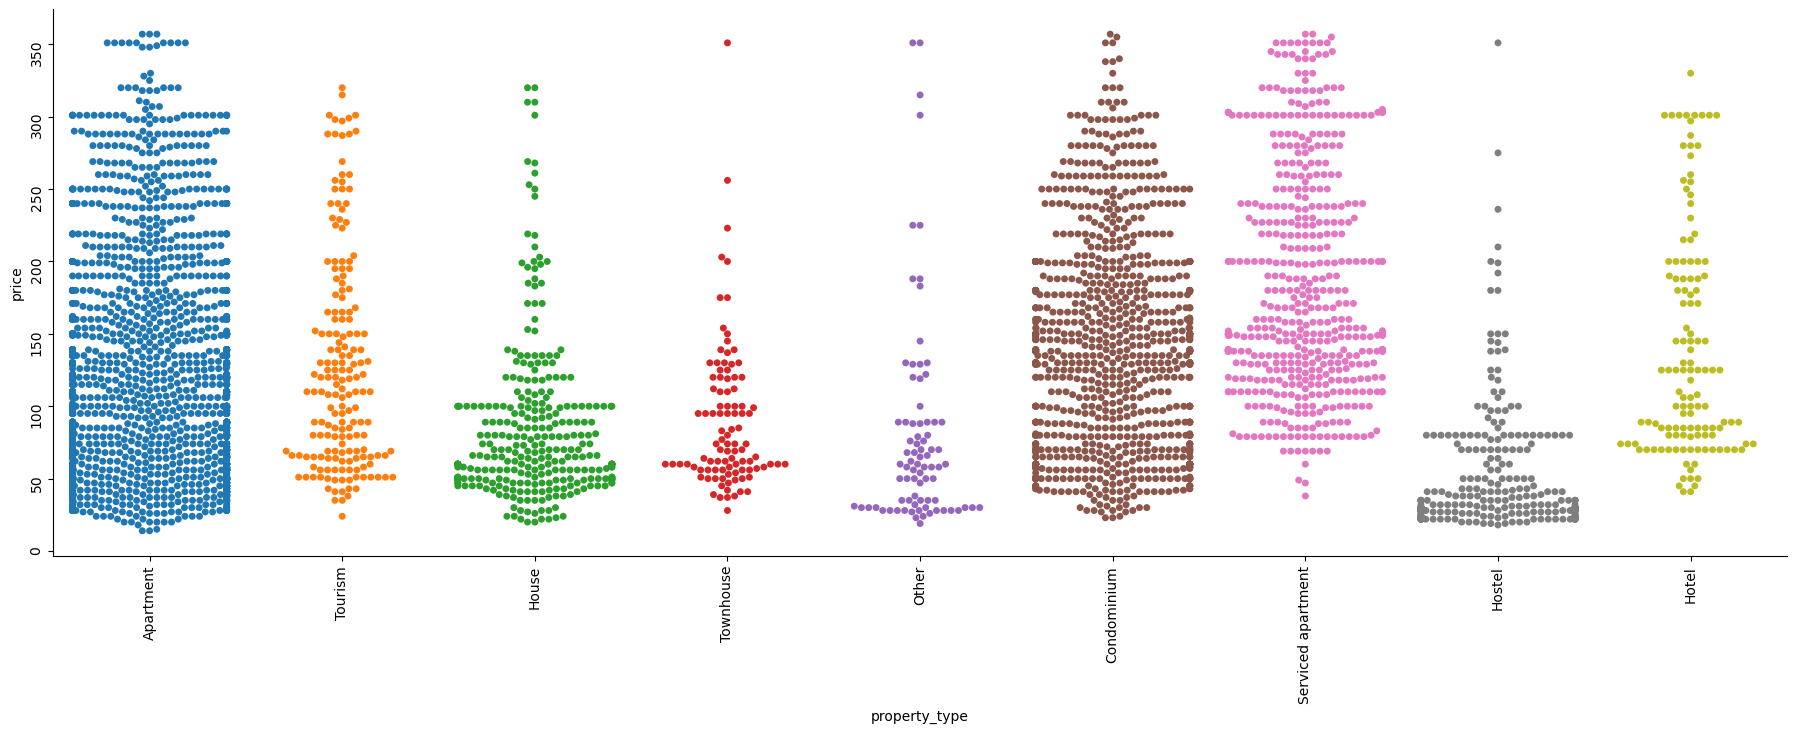

In [185]:
g = sns.catplot(x = 'property_type', y = 'price', data = air_df6, kind = 'swarm', height=6, aspect=3)
for ax in g.axes.flat :
    ax.tick_params(rotation= 90)
plt.plot()

In [186]:
air_df6['room_type'].value_counts()

Entire home/apt    2225
Private room       2153
Shared room         278
Name: room_type, dtype: int64

In [187]:
air_df6['bed_type'].value_counts()

Real Bed         4645
Pull-out Sofa       6
Futon               5
Name: bed_type, dtype: int64

In [188]:
air_df6.drop(['bed_type'], axis = 1, inplace=True)

In [189]:
# air_df6['total_amenities'].plot(kind = 'hist')

### Services & Requirements

In [190]:
# air_df6['guests_included'].plot(kind = 'hist')

In [191]:
# air_df6['extra_people'].plot(kind = 'hist')

In [192]:
# air_df6['minimum_nights'].plot(kind = 'hist')

In [193]:
air_df6['require_guest_profile_picture'].value_counts()

0    4603
1      53
Name: require_guest_profile_picture, dtype: int64

In [194]:
air_df6.drop(['require_guest_profile_picture'], axis = 1, inplace= True)

In [195]:
air_df6['require_guest_phone_verification'].value_counts()

0    4593
1      63
Name: require_guest_phone_verification, dtype: int64

In [196]:
air_df6.drop(['require_guest_phone_verification'], axis = 1, inplace= True)

In [197]:
air_df6['instant_bookable'].value_counts()

1    2616
0    2040
Name: instant_bookable, dtype: int64

### Duration & Count

In [198]:
# air_df6['hosting_duration'].plot(kind = 'hist', bins=50, figsize = (10,10))

In [199]:
# air_df6['listing_duration'].plot(kind = 'hist', bins=50, figsize = (10,10))

In [200]:
# air_df6['calculated_host_listings_count'].plot(kind = 'hist', bins=50, figsize = (10,10))

### Availability Data

In [201]:
air_df6[['availability_30', 'availability_60', 'availability_90', 'availability_365', 'price']].corr()

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.924792,0.840682,0.495907,-0.063779
availability_60,0.924792,1.000000,0.963225,0.597689,-0.073878
availability_90,0.840682,0.963225,1.000000,0.662888,-0.060016
availability_365,0.495907,0.597689,0.662888,1.000000,0.007187
price,-0.063779,-0.073878,-0.060016,0.007187,1.000000


In [202]:
air_df6.drop(['availability_30', 'availability_90'], axis = 1, inplace = True)

### Reviews Data

In [203]:
air_df6[[
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]].corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.798563,0.780180,0.694333,0.734944,0.587681,0.817920
review_scores_accuracy,0.798563,1.000000,0.678996,0.677837,0.691444,0.559274,0.748828
review_scores_cleanliness,0.780180,0.678996,1.000000,0.596947,0.589601,0.490696,0.706866
review_scores_checkin,0.694333,0.677837,0.596947,1.000000,0.751606,0.577178,0.654646
review_scores_communication,0.734944,0.691444,0.589601,0.751606,1.000000,0.573773,0.676383
review_scores_location,0.587681,0.559274,0.490696,0.577178,0.573773,1.000000,0.575820
review_scores_value,0.817920,0.748828,0.706866,0.654646,0.676383,0.575820,1.000000


In [204]:
# air_df6[['number_of_reviews_ltm']].plot(kind = 'hist')

### Dataset Cleaned!

After cleaning every variable, the data should be pretty clean for analysis. We output air_df6 to air_clean.csv. I personally like to do data visualization from orange at the moment.

In [205]:
air_df6.to_csv('air_clean.csv')

## Get dummy (One-Hot Encoding)

In [74]:
air_df7 = air_df6.copy()

In [75]:
air_df7.dtypes[air_df7.dtypes == object]

neighbourhood_group_cleansed    object
property_type                   object
room_type                       object
dtype: object

In [76]:
dummy_variables = pd.get_dummies(air_df7[['neighbourhood_group_cleansed', 'property_type', 'room_type']])
air_df7 = pd.concat([air_df7, dummy_variables], axis=1)
air_df7.drop(['neighbourhood_group_cleansed', 'property_type', 'room_type'], axis=1, inplace = True)
air_df7.head()

,host_is_superhost,host_identity_verified,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_60,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,Cleaning before checkout,Room-darkening shades,BBQ grill,Garden or backyard,Flat path to guest entrance,Extra space around bed,Coffee maker,Suitable for events,Crib,Wide entryway,Handheld shower head,Wide entrance,Wide hallways,High chair,Wide entrance for guests,Free street parking,Hot tub,Private living room,Breakfast,Other,Building staff,Buzzer/wireless intercom,Patio or balcony,Keypad,translation missing: en.hosting_amenity_49,Wheelchair accessible,Well-lit path to entrance,Single level home,24-hour check-in,Pets allowed,translation missing: en.hosting_amenity_50,Smoking allowed,Oven,Paid parking on premises,Safety card,Cable TV,Extra pillows and blankets,Carbon monoxide detector,Paid parking off premises,Cooking basics,Host greets you,Private entrance,Self check-in,Stove,Luggage dropoff allowed,Dishes and silverware,Internet,Heating,First aid kit,No stairs or steps to enter,Free parking on premises,Microwave,Bed linens,Family/kid friendly,Refrigerator,Fire extinguisher,Gym,Smoke detector,Long term stays allowed,Pool,Lock on bedroom door,Dryer,Hot water,Elevator,TV,Laptop friendly workspace,Shampoo,Iron,Hair dryer,Kitchen,Hangers,Washer,Essentials,total_amenities,listing_duration,hosting_duration,is_singaporean,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,property_type_Apartment,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,property_type_Serviced apartment,property_type_Tourism,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,0,0,81,1,14,180,360,60,365,0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,0,2,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,10,0.0,1097.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
50646,0,0,80,2,20,90,730,60,365,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,0,1,0.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,14,252.0,1570.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
56334,0,0,68,1,14,6,14,60,365,0,98.0,10.0,10.0,10.0,10.0,8.0,9.0,0,2,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,11,1559.0,1807.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
71609,0,1,200,4,27,1,1125,51,353,2,80.0,8.0,8.0,9.0,9.0,8.0,8.0,1,9,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,27,2575.0,2899.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
71896,0,1,92,1,20,1,1125,51,353,0,80.0,8.0,8.0,9.0,9.0,8.0,8.0,1,9,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,23,2206.0,2388.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


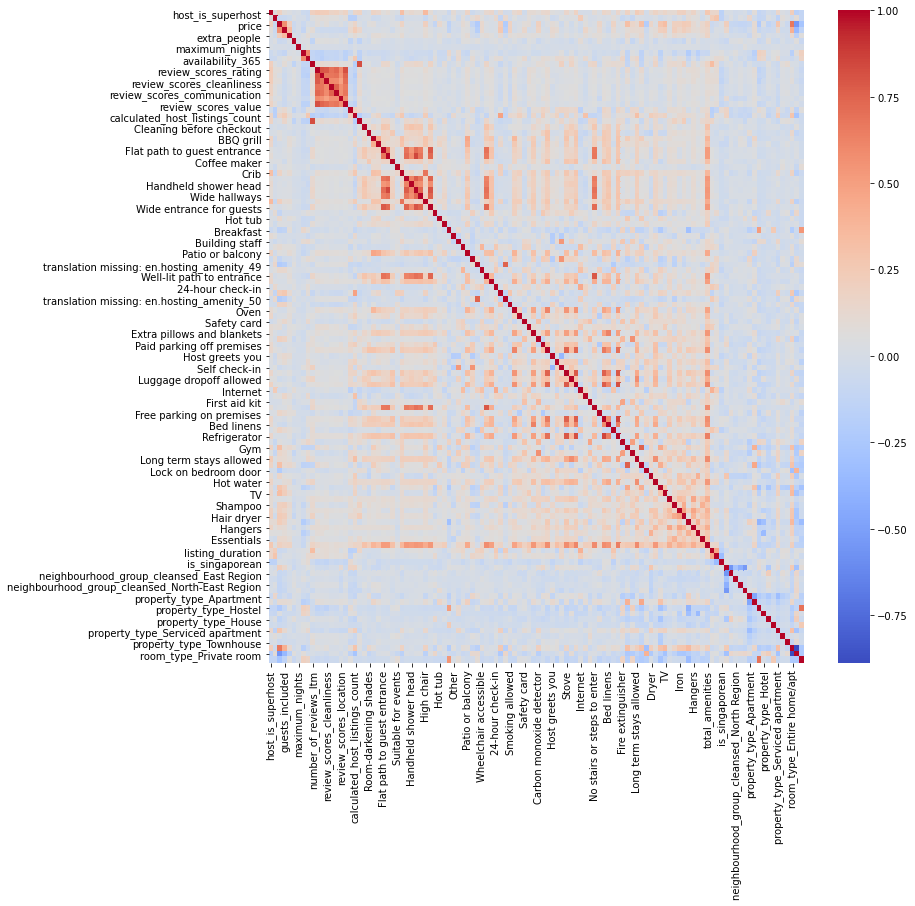

In [77]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(air_df7.corr(), cmap='coolwarm')
plt.rcParams.update({'font.size': 4})
plt.show()

## Train-test Split

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

y = air_df7['price'] # Target
X = air_df7.drop(['price'], axis = 1) # Predictors

# Standardize
scaler = StandardScaler()

X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)

X_train = scaler.fit_transform(X_train_o)
X_test = scaler.transform(X_test_o)

## Data Modelling

### Machine Learning Models

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
# Decision Tree Model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print(mean_squared_error(tree.predict(X_train), y_train))
print(mean_squared_error(tree.predict(X_test), y_test))
print(tree.score(X_test, y_test))
print(mean_absolute_error(tree.predict(X_train), y_train))
print(mean_absolute_error(tree.predict(X_test), y_test))

0.0
3038.3235504652826
0.5153127228912655
0.0
34.71009305654975


In [81]:
# Decision Tree Model
tree = DecisionTreeRegressor(max_depth=7)
tree.fit(X_train, y_train)
print(mean_squared_error(tree.predict(X_train), y_train))
print(mean_squared_error(tree.predict(X_test), y_test))
print(tree.score(X_test, y_test))
print(mean_absolute_error(tree.predict(X_train), y_train))
print(mean_absolute_error(tree.predict(X_test), y_test))

1293.6293838299343
2100.201876015275
0.6649661855437963
24.657374442701798
30.733127513593818


In [82]:
# Linear Regression Models 

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(mean_squared_error(linreg.predict(X_train), y_train))
print(mean_squared_error(linreg.predict(X_test), y_test))
print(linreg.score(X_test, y_test))
print(mean_absolute_error(linreg.predict(X_train), y_train))
print(mean_absolute_error(linreg.predict(X_test), y_test))

1812.560524724258
2061.750962389775
0.6711000512489917
30.772211507764055
31.73762343467159


In [83]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(mean_squared_error(rf.predict(X_train), y_train))
print(mean_squared_error(rf.predict(X_test), y_test))
print(rf.score(X_test, y_test))
print(mean_absolute_error(rf.predict(X_train), y_train))
print(mean_absolute_error(rf.predict(X_test), y_test))

192.1976318502608
1469.0641971367215
0.7656481563660043
9.16723534826634
25.512226198997855


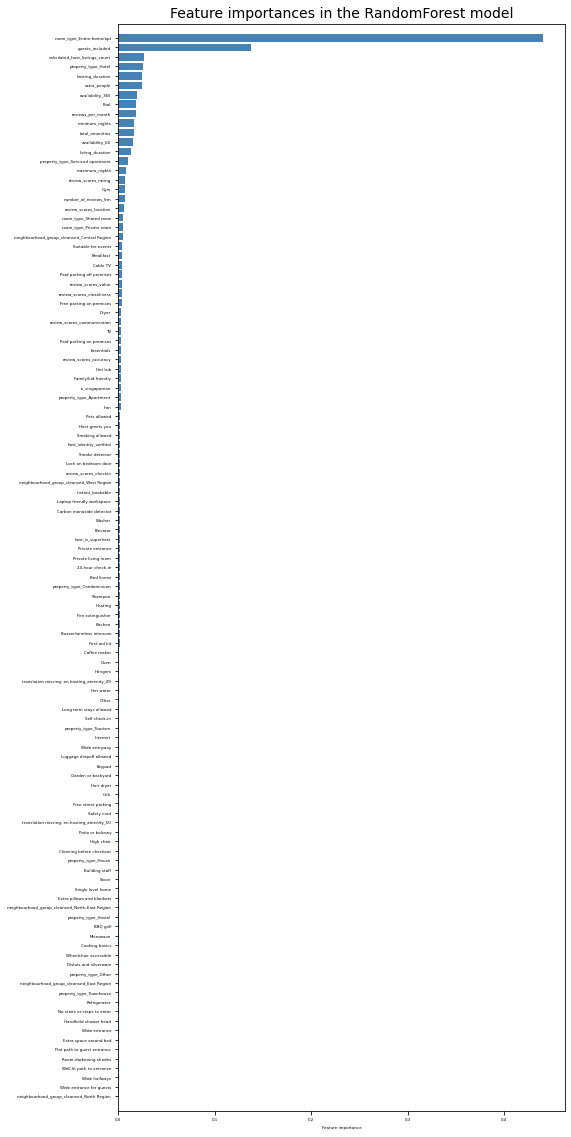

In [84]:
# Producing a dataframe of feature importances
ft_weights_rf = pd.DataFrame(rf.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_rf.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_rf.index, ft_weights_rf.weight, align='center', color = 'steelblue')
plt.rcParams.update({'font.size' : 10})
plt.title("Feature importances in the RandomForest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

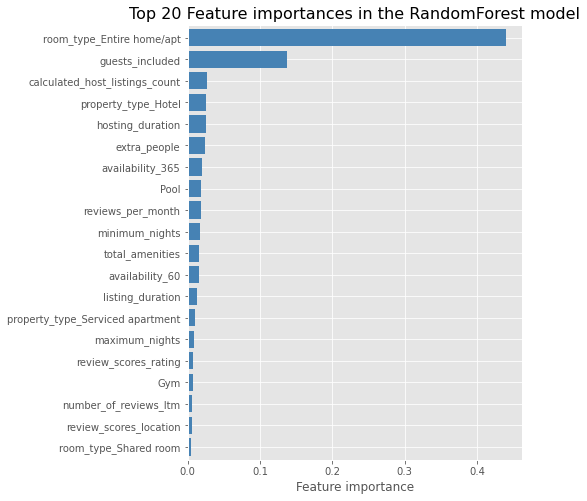

In [85]:
# Producing a dataframe of feature importances
ft_weights_rf2 = pd.DataFrame(rf.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_rf2.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(6,8))
plt.style.use('ggplot')
plt.barh(ft_weights_rf.index[-20:], ft_weights_rf.weight[-20:], align='center', color = 'steelblue') 
plt.title("Top 20 Feature importances in the RandomForest model", fontsize=16)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


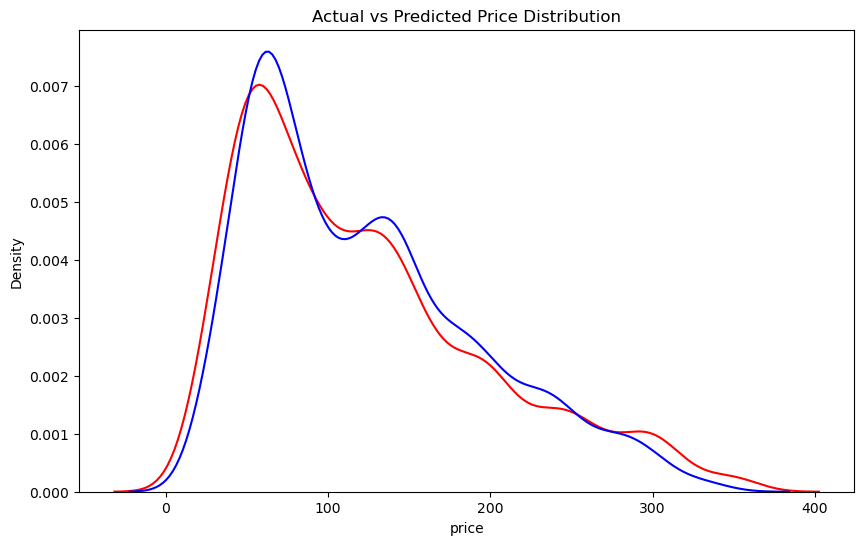

In [86]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.rcParams.update(mpl.rcParamsDefault)
    width = 10
    height = 6
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)

    plt.show()
    plt.close()

DistributionPlot(y_train, rf.predict(X_train), "Actual Values (Train)", "Predicted Values (Train)", "Actual vs Predicted Price Distribution")

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


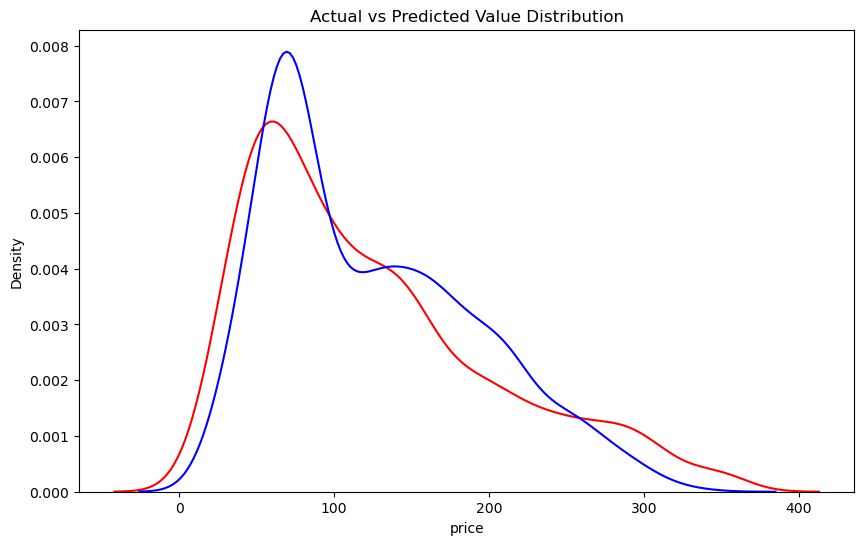

In [87]:
DistributionPlot(y_test, rf.predict(X_test), "Actual Values (Test)", "Predicted Values (Test)", "Actual vs Predicted Value Distribution")

### Log Transform - Price

A try of using logarithmic transformation to price, which is probably the better practice than not transforming. However, author doesn't see much improvement (This section can be skipped)

In [88]:
air_df8 = air_df7.copy()

In [89]:
from sklearn.model_selection import train_test_split, cross_val_score

y_log = np.log(air_df8['price'])
X = air_df8.drop(['price'], axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_o, X_test_o, y_train_log, y_test_log = train_test_split(X, y_log, test_size = 0.3, random_state = 47)

X_train = scaler.fit_transform(X_train_o)
X_test = scaler.transform(X_test_o)

In [90]:
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train_log)
print(mean_squared_error(linreg2.predict(X_train), y_train_log))
print(mean_squared_error(linreg2.predict(X_test), y_test_log))

0.10896471367772952
0.11560068070476213


In [91]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor()
rf2.fit(X_train, y_train_log)
print(mean_squared_error(rf2.predict(X_train), y_train_log))
print(mean_squared_error(rf2.predict(X_test), y_test_log))
print(rf2.score(X_test, y_test_log))

0.012111318440975443
0.0847493330555943
0.8127861416569397


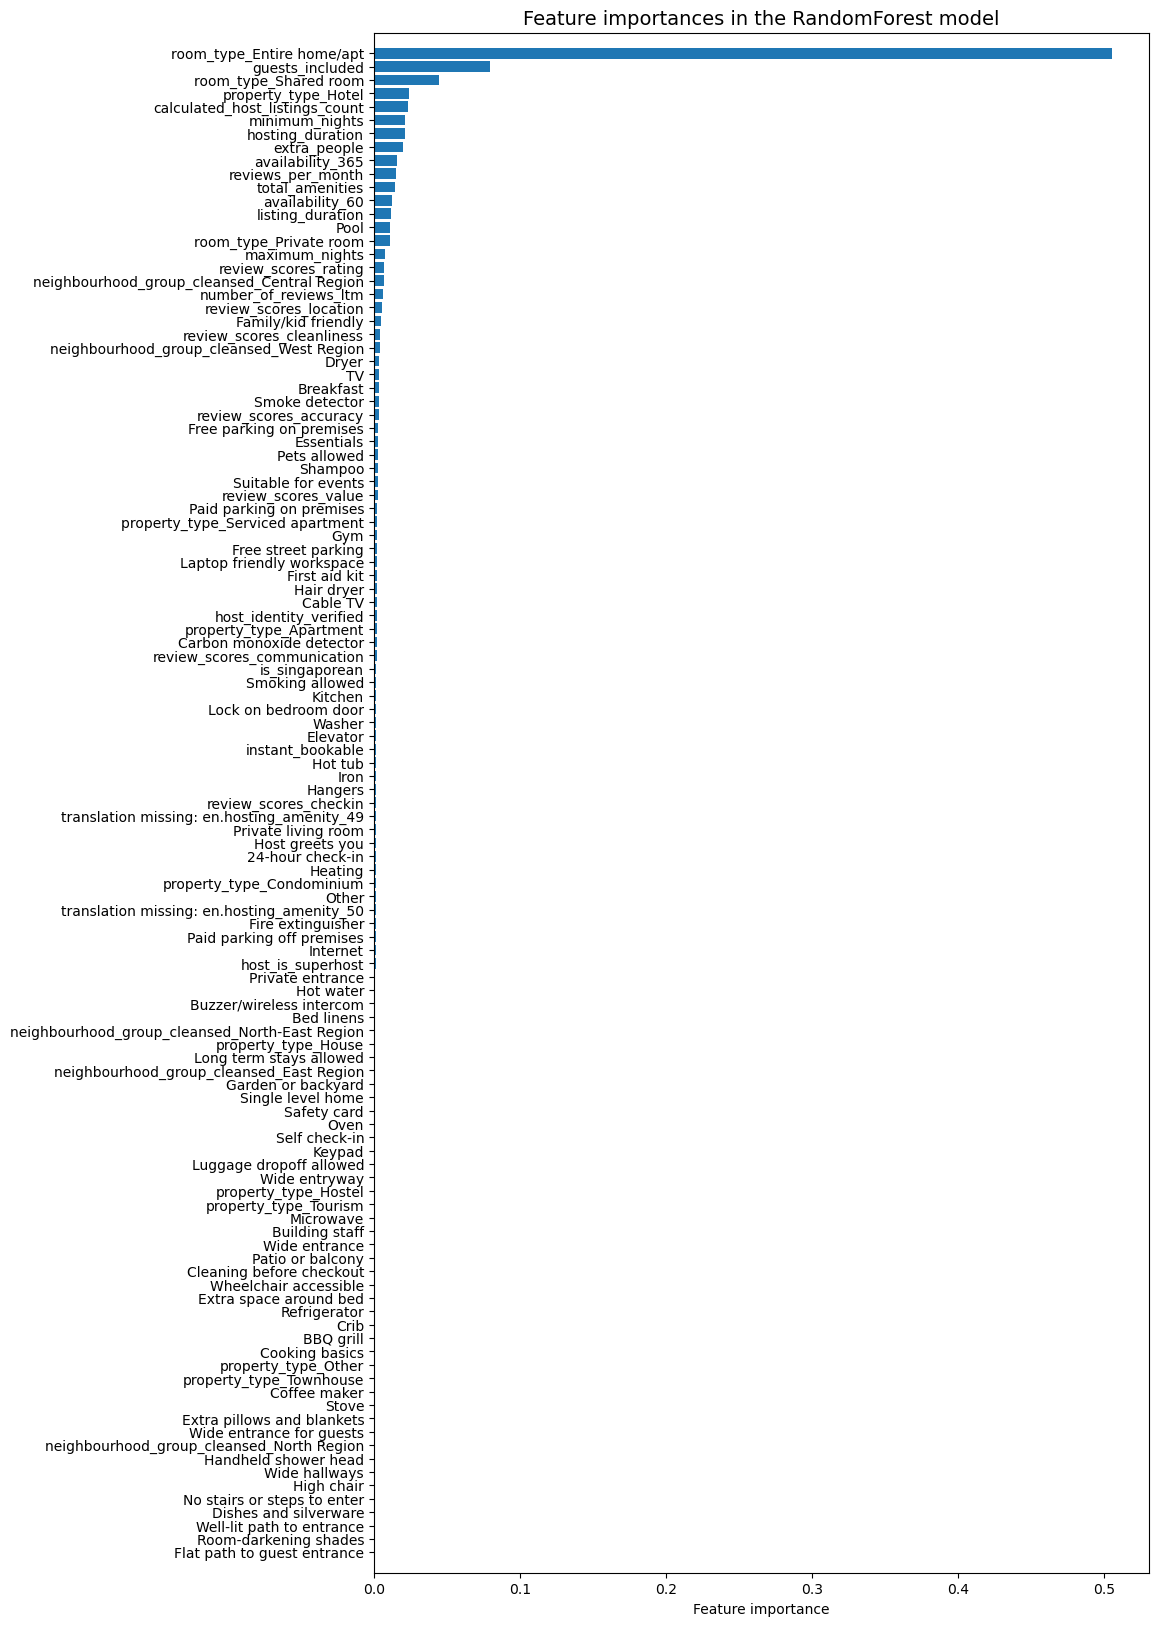

In [92]:
# Producing a dataframe of feature importances
ft_weights_rf2 = pd.DataFrame(rf2.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_rf2.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(10,20))
plt.barh(ft_weights_rf2.index, ft_weights_rf2.weight, align='center') 
plt.title("Feature importances in the RandomForest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

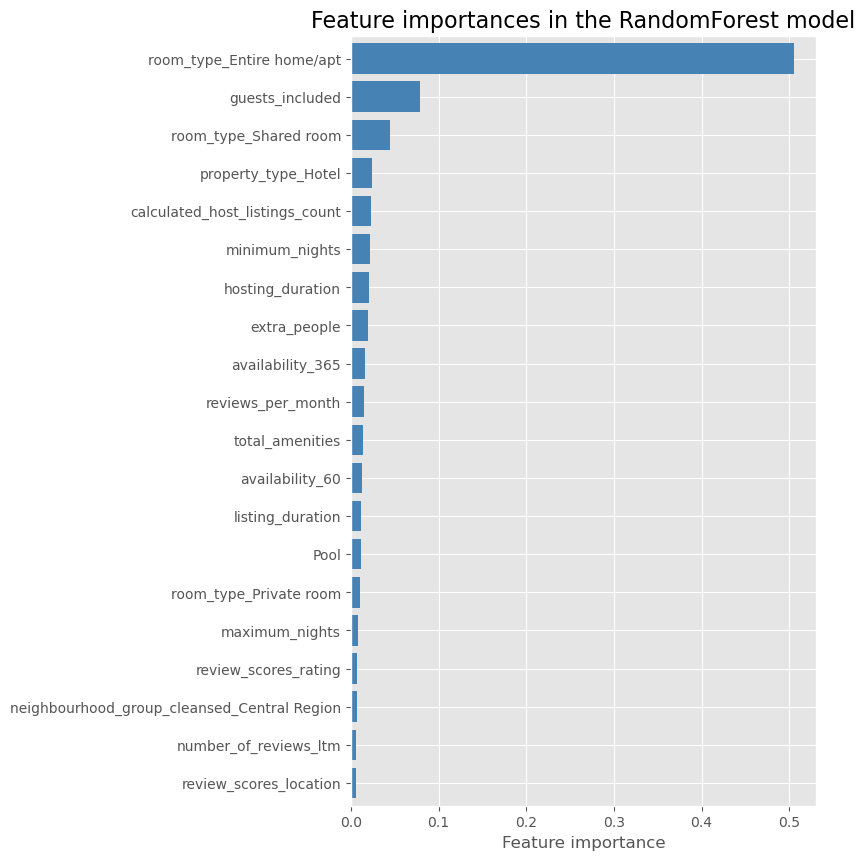

In [93]:
# Slicing the top 20 features

# Producing a dataframe of feature importances
ft_weights_rf2 = pd.DataFrame(rf2.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_rf2.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(6,10))
plt.style.use('ggplot')
plt.barh(ft_weights_rf2.index[-20:], ft_weights_rf2.weight[-20:], align='center', color = 'steelblue') 
plt.title("Feature importances in the RandomForest model", fontsize=16)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [94]:
print("Real Training MSE:", mean_squared_error(np.exp(rf2.predict(X_train)), np.exp(y_train_log)))
print("Real Validation MSE:", mean_squared_error(np.exp(rf2.predict(X_test)), np.exp(y_test_log)))

Real Training MSE: 248.52748701030438
Real Validation MSE: 1494.69548276165


In [95]:
print("Real Training MAE:", mean_absolute_error(np.exp(rf2.predict(X_train)), np.exp(y_train_log)))
print("Real Validation MAE:", mean_absolute_error(np.exp(rf2.predict(X_test)), np.exp(y_test_log)))

Real Training MAE: 9.359100407610605
Real Validation MAE: 24.5270054825304


C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


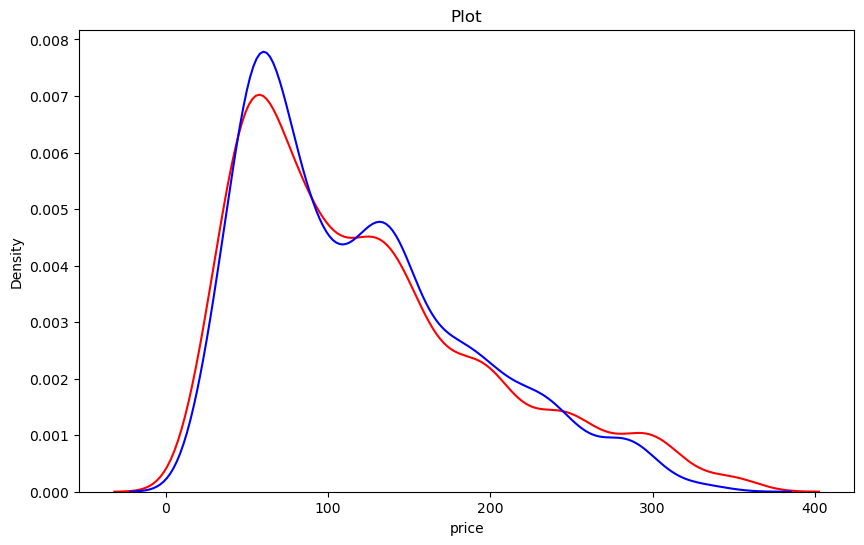

In [96]:
DistributionPlot(np.exp(y_train_log), np.exp(rf2.predict(X_train)), "Actual Values (Train)", "Predicted Values (Train)", "Plot")

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


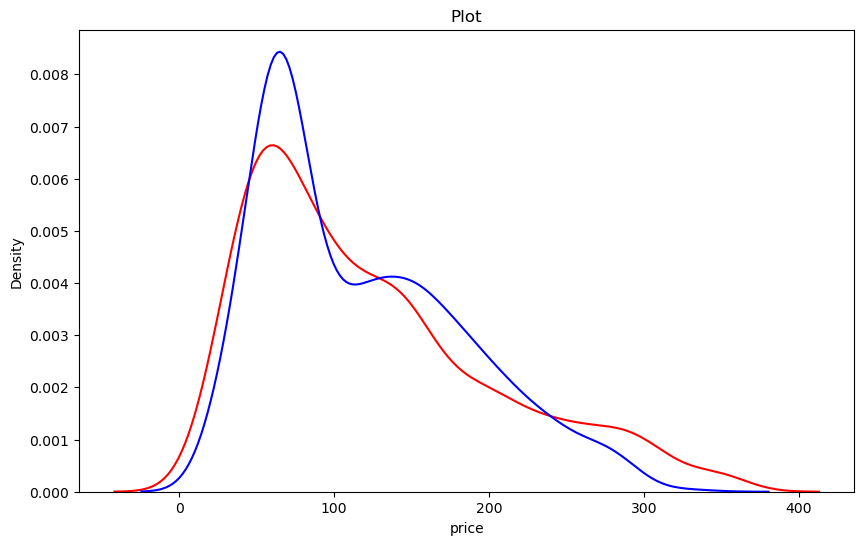

In [97]:
DistributionPlot(np.exp(y_test_log), np.exp(rf2.predict(X_test)), "Actual Values (Train)", "Predicted Values (Train)", "Plot")

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf3 = RandomForestRegressor(max_depth=50)
rf3.fit(X_train, y_train_log)
print(mean_squared_error(rf3.predict(X_train), y_train_log))
print(mean_squared_error(rf3.predict(X_test), y_test_log))
print(rf3.score(X_test, y_test_log))

0.012094554039194542
0.08458900813798569
0.8131403042837341


### Hyperparameter Tuning

A try of hyperparameter tuning, the result is not significant for this dataset. (Can be skipped)

In [99]:
rf = RandomForestRegressor()

parameters1 = dict(
    n_estimators=[20, 50, 100, 200],
    max_depth=[2, 5, 10, 20, None],
    min_samples_leaf=[2, 4, 10]
)

from sklearn.model_selection import GridSearchCV
Grid1 = GridSearchCV(rf, parameters1, cv=3, n_jobs=-1, verbose = 2)
Grid1.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20, None],
                         'min_samples_leaf': [2, 4, 10],
                         'n_estimators': [20, 50, 100, 200]},
             verbose=2)

In [100]:
Grid1.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 50}

In [101]:
best_rf = Grid1.best_estimator_

In [102]:
best_rf.score(X_test, y_test)

0.7668934692574494

In [103]:
mean_squared_error(best_rf.predict(X_train), y_train)

304.7603219893191

In [104]:
mean_squared_error(best_rf.predict(X_test), y_test)

1461.2577956393557

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


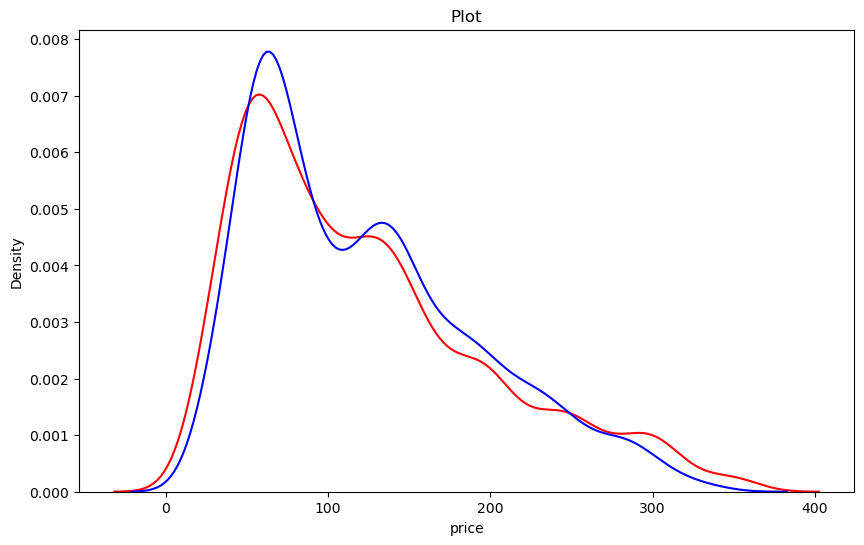

In [105]:
DistributionPlot(y_train, best_rf.predict(X_train), "Actual Values (Train)", "Predicted Values (Train)", "Plot")

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


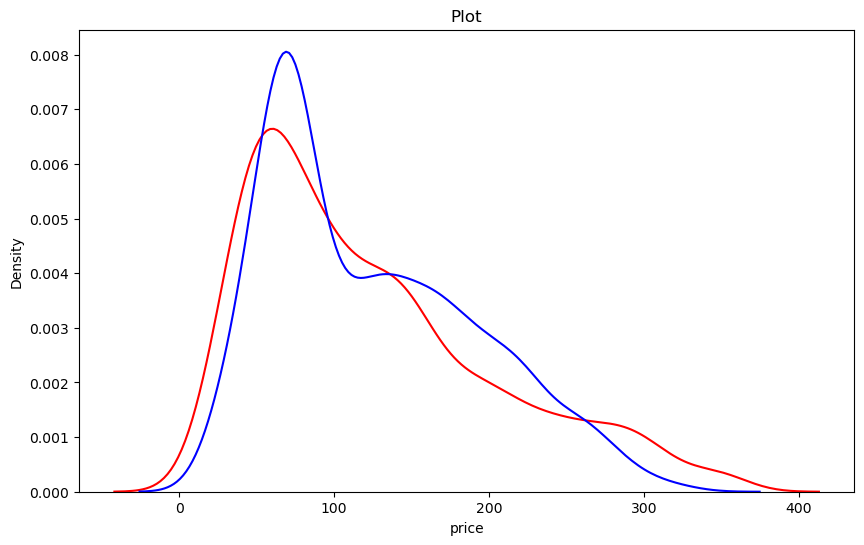

In [106]:
DistributionPlot(y_test, best_rf.predict(X_test), "Actual Values (Train)", "Predicted Values (Train)", "Plot")

## Conclusion & Recommendation

### Conclusion

The best model we get is random forest model. With less than 5000 data, we can get R2 score as high as 0.77 on the price data (and 0.81 on the log-price data). That means that the model was able to capture 77% of the data. That being said, there are a lot of room of improvements for building AirBNB predictive model. Use of spatial modelling will most likely improve the accuracy. Use of text analysis such as sentiment analysis also have improvement potentials.

For the data modelling process, we can also see that the MSE of training and testing data differ greatly. Theoritically, there should be a way to simplify the model so that the testing error decreases. That being said, the author had tried methods from reducing more variables, adding regularization parameters, and parameter tuning which didn't result in significant improvement. The author's hypothesis is that the metric (using MSE) may be not the best metric for predicting price since the distribution is very skewed resulting in test error being high because listings that have high prices are not modelled properly. If that is true, then adding more data will be the more appropriate action.

### Recommendations

Within this case study, the author as a data scientist recommend AirBNB Team to :
1. Apply price recommendation system so that optimal price that can be accepted by both host and renter could be achieved more frequently
2. Give a hint or guidance to hosts, about what service can be added and how significant the service is in increasing the value of the host listings.
3. Never stop collecting data, since more data means more accuracy and more profit

### Forewords from Author

Aside from this project, the author see a lot of other insights still hiding in this dataset. Predicting outlier, to tell whether a listing is among the most expensive, could be an interesting project. That way, company can manually price the few selected outlier to increase profits. Taking spatial data, from Google or Foursquare, then doing spatial analysis is a promising but challenging project. Analyzing ratings to predict satisfaction could be interesting too, however since rating is subjective, it will be really hard if not impossible to give satisfaction score accurately. 

In the end, the author felt that there were still a lot to be learnt. While the author mastery in data analytics is far from perfect, the author could see that the road of data science and AI is worth pursuing.

### Credit

1. Szotek, Maksym. 2018. [https://rstudio-pubs-static.s3.amazonaws.com/407929_afc5ef0f2ad648389447a6ca3f4a7cd4.html](https://rstudio-pubs-static.s3.amazonaws.com/407929_afc5ef0f2ad648389447a6ca3f4a7cd4.html)
2. Lewis, Laura. 2019. [https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-deep-learning-f46d44afb8a6](https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-deep-learning-f46d44afb8a6)
3. Carillo, Graciela. 2019. [https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-location-data-5c1e033d0a5a#3efa](https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-location-data-5c1e033d0a5a#3efa) 

In [131]:
latlng_data = air_df[['latitude', 'longitude']].head()
latlng_data.to_csv

,latitude,longitude
id,,
49091,1.44255,103.79580
50646,1.33235,103.78521
56334,1.44246,103.79667
71609,1.34541,103.95712
71896,1.34567,103.95963
